In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/MyDrive/Kaggle_API/kaggle.json
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/Kaggle_API/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/root/.kaggle"

Mounted at /content/drive
/content/drive/MyDrive/Kaggle_API/kaggle.json


In [ ]:
!kaggle datasets download vuppalaadithyasairam/bone-fracture-detection-using-xrays

Dataset URL: https://www.kaggle.com/datasets/vuppalaadithyasairam/bone-fracture-detection-using-xrays
License(s): unknown


In [ ]:
!unzip /content/bone-fracture-detection-using-xrays.zip

Streaming output truncated to the last 5000 lines.
  inflating: archive (6)/train/fractured/99-rotated2-rotated3-rotated3.jpg  
  inflating: archive (6)/train/fractured/99-rotated2-rotated3.jpg  
  inflating: archive (6)/train/fractured/99-rotated2.jpg  
  inflating: archive (6)/train/fractured/99-rotated3-rotated1-rotated1.jpg  
  inflating: archive (6)/train/fractured/99-rotated3-rotated1-rotated2.jpg  
  inflating: archive (6)/train/fractured/99-rotated3-rotated1-rotated3.jpg  
  inflating: archive (6)/train/fractured/99-rotated3-rotated1.jpg  
  inflating: archive (6)/train/fractured/99-rotated3-rotated2-rotated1.jpg  
  inflating: archive (6)/train/fractured/99-rotated3-rotated2-rotated2.jpg  
  inflating: archive (6)/train/fractured/99-rotated3-rotated2-rotated3.jpg  
  inflating: archive (6)/train/fractured/99-rotated3-rotated2.jpg  
  inflating: archive (6)/train/fractured/99-rotated3-rotated3-rotated1.jpg  
  inflating: archive (6)/train/fractured/99-rotated3-rotated3-rotated2

# Import Needed Libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score  ,roc_curve, auc ,ConfusionMatrixDisplay
import seaborn as sns
import cv2
import hashlib
from collections import Counter
from PIL import Image
import csv
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, Dataset


from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, accuracy_score

# EDA

In [ ]:
# load training data
train_fractured_path='/content/archive (6)/train/fractured'
train_fractured=[]
train_fractured_paths = []
for image in os.listdir(train_fractured_path):
  image_path=os.path.join(train_fractured_path,image)
  img=cv2.imread(image_path)
  train_fractured.append(img)
  train_fractured_paths.append(image_path)

train_not_fractured_path='/content/archive (6)/train/not fractured'
train_not_fractured=[]
train_not_fractured_paths = []
for image in os.listdir(train_not_fractured_path):
  image_path=os.path.join(train_not_fractured_path,image)
  img=cv2.imread(image_path)
  train_not_fractured.append(img)
  train_not_fractured_paths.append(image_path)


# load test data
test_fractured_path='/content/archive (6)/val/fractured'
test_fractured=[]
test_fractured_paths=[]
for image in os.listdir(test_fractured_path):
  image_path=os.path.join(test_fractured_path,image)
  img=cv2.imread(image_path)
  test_fractured.append(img)
  test_fractured_paths.append(image_path)

test_not_fractured_path='/content/archive (6)/val/not fractured'
test_not_fractured=[]
test_not_fractured_paths=[]
for image in os.listdir(test_not_fractured_path):
  image_path=os.path.join(test_not_fractured_path,image)
  img=cv2.imread(image_path)
  test_not_fractured.append(img)
  test_not_fractured_paths.append(image_path)

In [ ]:
fractured_size = len(train_fractured_paths)
not_fractured_size = len(train_not_fractured_paths)
data = [fractured_size, not_fractured_size]
labels = ['Fractured', 'Not Fractured']

# Display counts
print(f'Fractured images: {fractured_size}')
print(f'Not Fractured images: {not_fractured_size}')

# Plotly bar chart
fig = go.Figure(data=[go.Bar(
    x=labels,
    y=data,
    text=data,
    textposition='outside',
    marker_color=['#66c2a5', '#fc8d62']  # similar to 'Set2' palette
)])

fig.update_layout(
    title='Training Data',
    xaxis_title='Category',
    yaxis_title='Number of Images',
    template='plotly_white',
    width=600,
    height=500
)

fig.show()


Fractured images: 4480
Not Fractured images: 4383


In [ ]:
# visualize validation dataset
import plotly.graph_objects as go

# Data
fractured_size = len(test_fractured_paths)
not_fractured_size = len(test_not_fractured_paths)
data = [fractured_size, not_fractured_size]
labels = ['Fractured', 'Not Fractured']

# Display counts
print(f'Fractured images : {fractured_size}')
print(f'Not Fractured images : {not_fractured_size}')

# Plotly bar chart
fig = go.Figure(data=[go.Bar(
    x=labels,
    y=data,
    text=data,
    textposition='outside',
    marker_color=['#66c2a5', '#fc8d62']  # colors similar to Seaborn 'Set2'
)])

fig.update_layout(
    title='Test Data',
    xaxis_title='Category',
    yaxis_title='Number of Images',
    template='plotly_white',
    width=600,
    height=500
)

fig.show()


Fractured images : 360
Not Fractured images : 240


Samples from train_fractured:


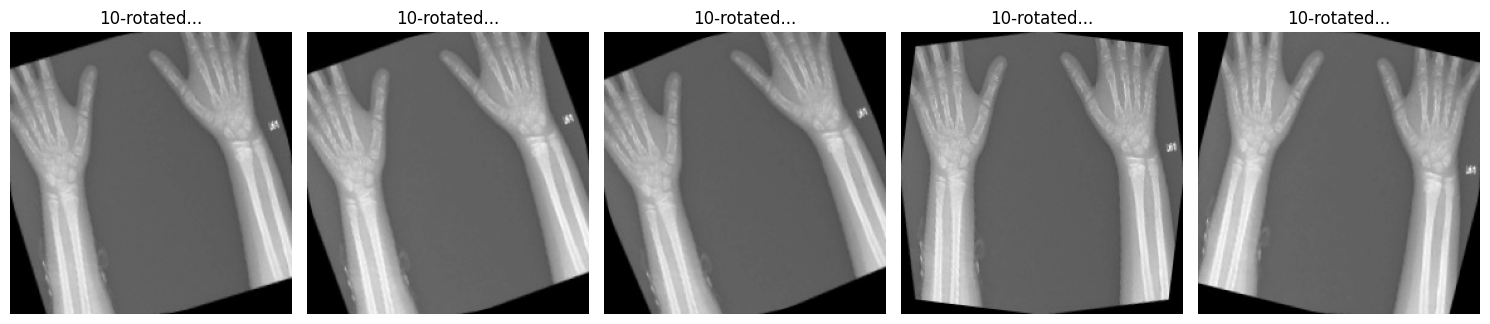

Samples from train_not_fractured:


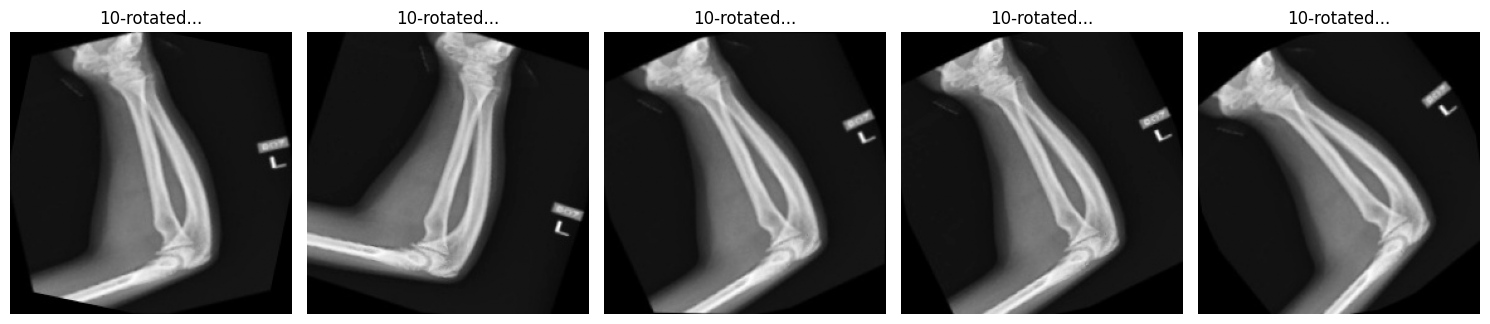

Samples from test_fractured:


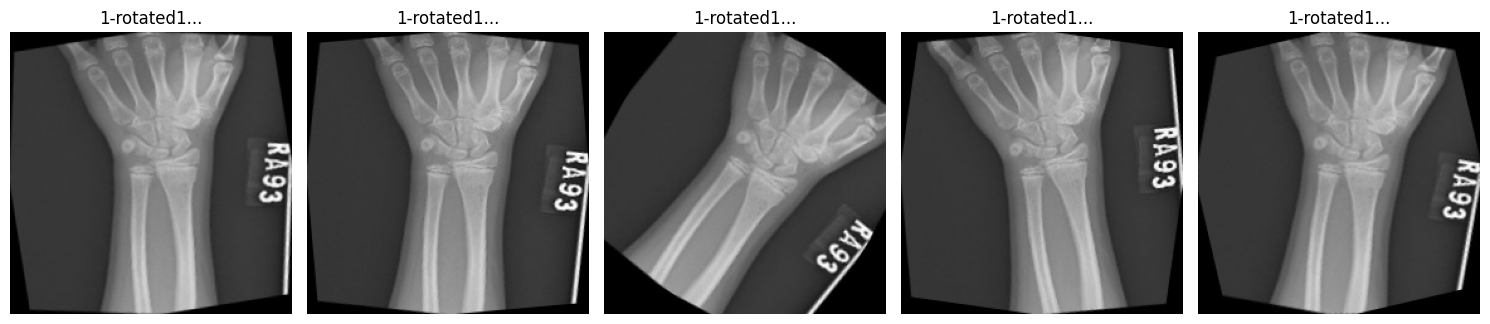

Samples from test_not_fractured:


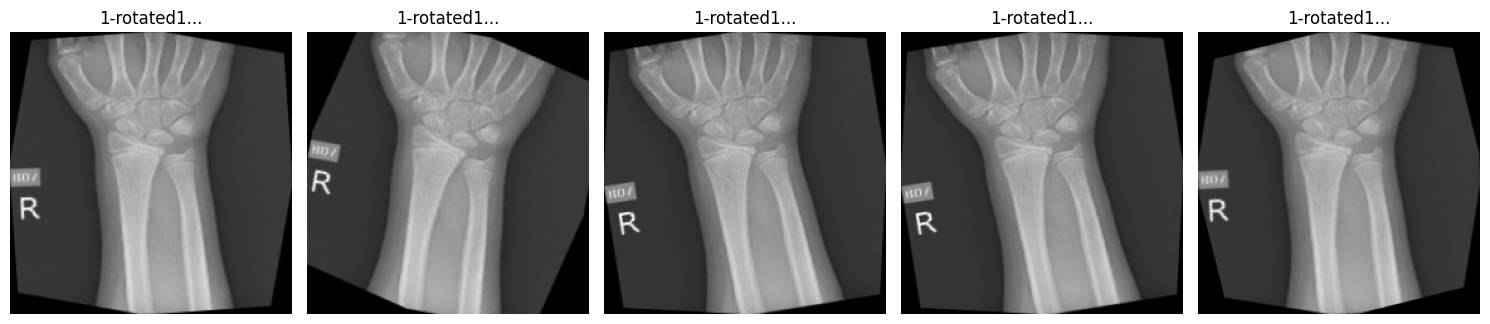

In [ ]:
def visualize_samples(dir_path, num_samples=5):
    images = sorted(os.listdir(dir_path))[:num_samples]  # sort alphabetically and pick first N
    plt.figure(figsize=(15, 5))

    for i, img_name in enumerate(images):
        img_path = os.path.join(dir_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # read as grayscale

        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(img_name[:10] + '...')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Define directories
directories = {
    'train_fractured': '/content/archive (6)/train/fractured',
    'train_not_fractured': '/content/archive (6)/train/not fractured',
    'test_fractured': '/content/archive (6)/val/fractured',
    'test_not_fractured': '/content/archive (6)/val/not fractured'
}

# Visualize samples from all folders
for folder_name, folder_path in directories.items():
    print(f"Samples from {folder_name}:")
    visualize_samples(folder_path, num_samples=5)


In [ ]:
# check corrupted images
def check_image_integrity(images):
  counter=0
  for image_path in images:
    img=cv2.imread(image_path)
    if img is None:
      images.remove(image_path)
      counter=counter+1
  return counter

directories = {
    'train_fractured': train_fractured_paths,
    'train_not_fractured':train_not_fractured_paths,
    'test_fractured': test_fractured_paths,
    'test_not_fractured': test_not_fractured_paths
}

for name , dir in directories.items():
  corrupted_removed_images=check_image_integrity(dir)
  print(f'corrupted - rmoved images from {name} is {corrupted_removed_images}')


corrupted - rmoved images from train_fractured is 0
corrupted - rmoved images from train_not_fractured is 0
corrupted - rmoved images from test_fractured is 0
corrupted - rmoved images from test_not_fractured is 0


In [ ]:
# visualize Training dataset
fractured_size = len(train_fractured_paths)
not_fractured_size = len(train_not_fractured_paths)
data = [fractured_size, not_fractured_size]
labels = ['Fractured', 'Not Fractured']

# Display counts
print(f'Fractured images: {fractured_size}')
print(f'Not Fractured images: {not_fractured_size}')

# Plotly bar chart
fig = go.Figure(data=[go.Bar(
    x=labels,
    y=data,
    text=data,
    textposition='outside',
    marker_color=['#66c2a5', '#fc8d62']  # similar to 'Set2' palette
)])

fig.update_layout(
    title='Training Data',
    xaxis_title='Category',
    yaxis_title='Number of Images',
    template='plotly_white',
    width=600,
    height=500
)

fig.show()


Fractured images: 4480
Not Fractured images: 4383


In [ ]:
# visualize validation dataset
import plotly.graph_objects as go

# Data
fractured_size = len(test_fractured_paths)
not_fractured_size = len(test_not_fractured_paths)
data = [fractured_size, not_fractured_size]
labels = ['Fractured', 'Not Fractured']

# Display counts
print(f'Fractured images : {fractured_size}')
print(f'Not Fractured images : {not_fractured_size}')

# Plotly bar chart
fig = go.Figure(data=[go.Bar(
    x=labels,
    y=data,
    text=data,
    textposition='outside',
    marker_color=['#66c2a5', '#fc8d62']  # colors similar to Seaborn 'Set2'
)])

fig.update_layout(
    title='Test Data',
    xaxis_title='Category',
    yaxis_title='Number of Images',
    template='plotly_white',
    width=600,
    height=500
)

fig.show()


Fractured images : 360
Not Fractured images : 240


In [ ]:
# remove duplicates
def remove_duplicate_images(image_paths):
    hashes = {}
    unique_images = []
    duplicates = []

    for image_path in image_paths:
        if not os.path.exists(image_path):
            print(f"File not found: {image_path}")
            continue

        try:
            with open(image_path, 'rb') as f:
                image_bytes = f.read()
                image_hash = hashlib.md5(image_bytes).hexdigest()
        except Exception as e:
            print(f"Error reading {image_path}: {e}")
            continue

        if image_hash in hashes:
            try:
                os.remove(image_path)
                duplicates.append((image_path, hashes[image_hash]))
            except Exception as e:
                print(f"Error removing {image_path}: {e}")
        else:
            hashes[image_hash] = image_path
            unique_images.append(image_path)

    return unique_images, duplicates

train_fractured_paths, train_fractured_duplicates = remove_duplicate_images(train_fractured_paths)
train_not_fractured_paths, train_not_fractured_duplicates = remove_duplicate_images(train_not_fractured_paths)
test_fractured_paths, val_fractured_duplicates = remove_duplicate_images(test_fractured_paths)
test_not_fractured_paths, val_not_fractured_duplicates = remove_duplicate_images(test_not_fractured_paths)

print(len(train_fractured_paths))
print(len(train_not_fractured_paths))
print(len(test_fractured_paths))
print(len(test_not_fractured_paths))



4385
4367
348
240


In [ ]:
# visualize Training dataset
fractured_size = len(train_fractured_paths)
not_fractured_size = len(train_not_fractured_paths)
data = [fractured_size, not_fractured_size]
labels = ['Fractured', 'Not Fractured']

# Display counts
print(f'Fractured images: {fractured_size}')
print(f'Not Fractured images: {not_fractured_size}')

# Plotly bar chart
fig = go.Figure(data=[go.Bar(
    x=labels,
    y=data,
    text=data,
    textposition='outside',
    marker_color=['#66c2a5', '#fc8d62']  # similar to 'Set2' palette
)])

fig.update_layout(
    title='Training Data',
    xaxis_title='Category',
    yaxis_title='Number of Images',
    template='plotly_white',
    width=600,
    height=500
)

fig.show()




Fractured images: 4385
Not Fractured images: 4367


In [ ]:
# visualize validation dataset
import plotly.graph_objects as go

# Data
fractured_size = len(test_fractured_paths)
not_fractured_size = len(test_not_fractured_paths)
data = [fractured_size, not_fractured_size]
labels = ['Fractured', 'Not Fractured']

# Display counts
print(f'Fractured images : {fractured_size}')
print(f'Not Fractured images : {not_fractured_size}')

# Plotly bar chart
fig = go.Figure(data=[go.Bar(
    x=labels,
    y=data,
    text=data,
    textposition='outside',
    marker_color=['#66c2a5', '#fc8d62']  # colors similar to Seaborn 'Set2'
)])

fig.update_layout(
    title='Test Data',
    xaxis_title='Category',
    yaxis_title='Number of Images',
    template='plotly_white',
    width=600,
    height=500
)

fig.show()


Fractured images : 348
Not Fractured images : 240


In [ ]:
# check images needed for resize and store them
def check_size(images):
  out_size=[]
  for image_path in images:
      img=cv2.imread(image_path)
      if img is None:
            continue
      height, width = img.shape[:2]
      if (width, height) != (224,224):
        out_size.append(image_path)
  return out_size


TF_outsize=check_size(train_fractured_paths)
T_not_F_outsize=check_size(train_not_fractured_paths)
test_F_outsize=check_size(test_fractured_paths)
test_not_F_outsize=check_size(test_not_fractured_paths)

print(f'Images not 224x224 (TF): {len(TF_outsize)}')
print(f'Images not 224x224 (T_Not_F): {len(T_not_F_outsize)}')
print(f'Images not 224x224 (VF): {len(test_F_outsize)}')
print(f'Images not 224x224 (V_not_F): {len(test_not_F_outsize)}')

# visualize output
counts = [
    len(TF_outsize),
    len(T_not_F_outsize),
    len(test_F_outsize),
    len(test_not_F_outsize)
]

labels = ['Train Fractured', 'Train Not Fractured', 'Test Fractured', 'Test Not Fractured']

df = pd.DataFrame({'Category': labels, 'Count': counts})
fig = px.bar(
    df,
    x='Category',
    y='Count',
    text='Count',
    color='Category',
    color_discrete_sequence=px.colors.qualitative.Set2,
    title='Images Not Sized 224x224'
)

fig.update_traces(textposition='outside')

fig.update_layout(
    yaxis_title='Number of Images',
    xaxis_title=None,
    xaxis_tickangle=45,
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    width=600,
    height=500,
    title_x=0.5  # Center the title
)

fig.show()


Images not 224x224 (TF): 111
Images not 224x224 (T_Not_F): 63
Images not 224x224 (VF): 9
Images not 224x224 (V_not_F): 4


In [ ]:
# resize all images with 224*224
def resize_image(image_paths, target_size=(224, 224)):
    for path in image_paths:
        img = cv2.imread(path)
        if img is None:
            continue
        resized_image = cv2.resize(img, target_size)
        cv2.imwrite(path, resized_image)



resize_image(train_fractured_paths)
resize_image(train_not_fractured_paths)
resize_image(test_fractured_paths)
resize_image(test_not_fractured_paths)


In [ ]:
# visualize Training dataset
import plotly.graph_objects as go

# Data
fractured_size = len(train_fractured_paths)
not_fractured_size = len(train_not_fractured_paths)
data = [fractured_size, not_fractured_size]
labels = ['Fractured', 'Not Fractured']

# Display counts
print(f'Fractured images: {fractured_size}')
print(f'Not Fractured images: {not_fractured_size}')

# Plotly bar chart
fig = go.Figure(data=[go.Bar(
    x=labels,
    y=data,
    text=data,
    textposition='outside',
    marker_color=['#66c2a5', '#fc8d62']  # similar to 'Set2' palette
)])

fig.update_layout(
    title='Training Data',
    xaxis_title='Category',
    yaxis_title='Number of Images',
    template='plotly_white',
    width=600,
    height=500
)

fig.show()


Fractured images: 4385
Not Fractured images: 4367


In [ ]:
# visualize validation dataset
import plotly.graph_objects as go

# Data
fractured_size = len(test_fractured_paths)
not_fractured_size = len(test_not_fractured_paths)
data = [fractured_size, not_fractured_size]
labels = ['Fractured', 'Not Fractured']

# Display counts
print(f'Fractured images : {fractured_size}')
print(f'Not Fractured images : {not_fractured_size}')

# Plotly bar chart
fig = go.Figure(data=[go.Bar(
    x=labels,
    y=data,
    text=data,
    textposition='outside',
    marker_color=['#66c2a5', '#fc8d62']  # colors similar to Seaborn 'Set2'
)])

fig.update_layout(
    title='Test Data',
    xaxis_title='Category',
    yaxis_title='Number of Images',
    template='plotly_white',
    width=600,
    height=500
)

fig.show()


Fractured images : 348
Not Fractured images : 240


In [ ]:
# recheck for outsize images
TF_outsize=check_size(train_fractured_paths)
T_not_F_outsize=check_size(train_not_fractured_paths)
val_F_outsize=check_size(test_fractured_paths)
val_not_F_outsize=check_size(test_not_fractured_paths)

print(f'Images not 224x224 (TF): {len(TF_outsize)}')
print(f'Images not 224x224 (T_Not_F): {len(T_not_F_outsize)}')
print(f'Images not 224x224 (VF): {len(val_F_outsize)}')
print(f'Images not 224x224 (V_not_F): {len(val_not_F_outsize)}')


Images not 224x224 (TF): 0
Images not 224x224 (T_Not_F): 0
Images not 224x224 (VF): 0
Images not 224x224 (V_not_F): 0


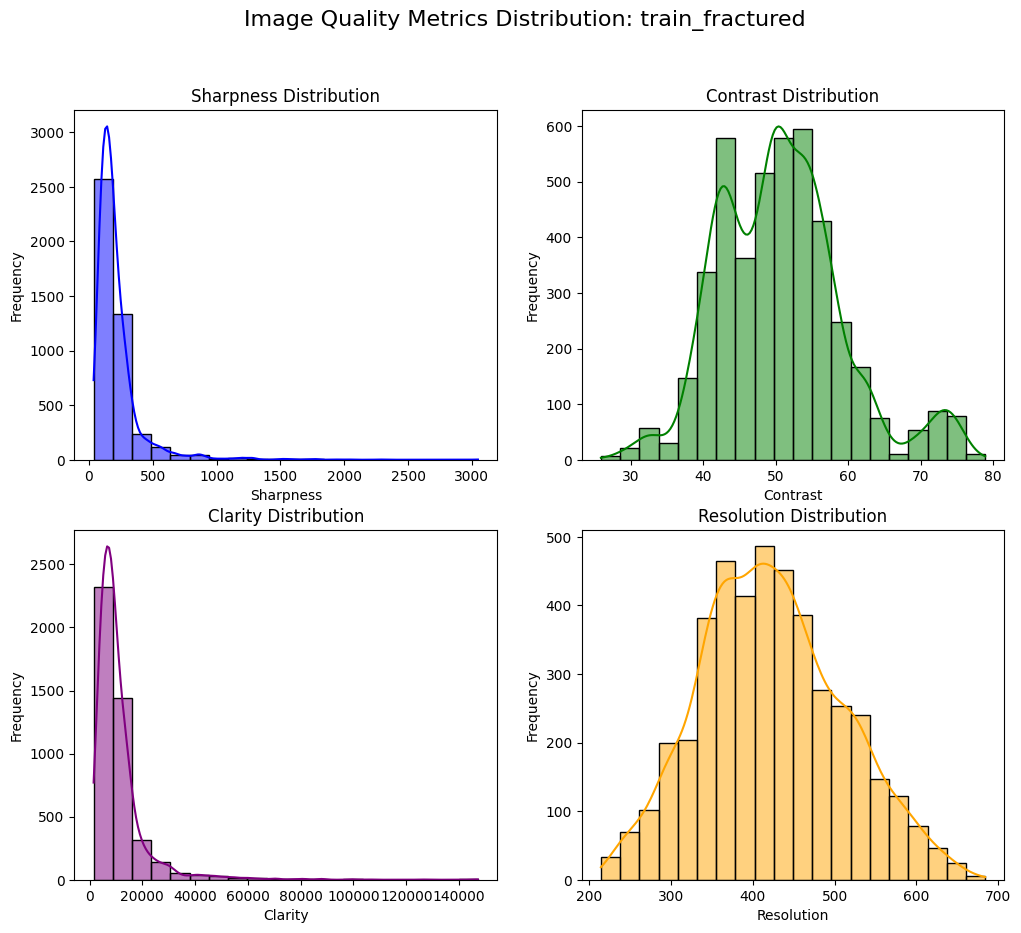

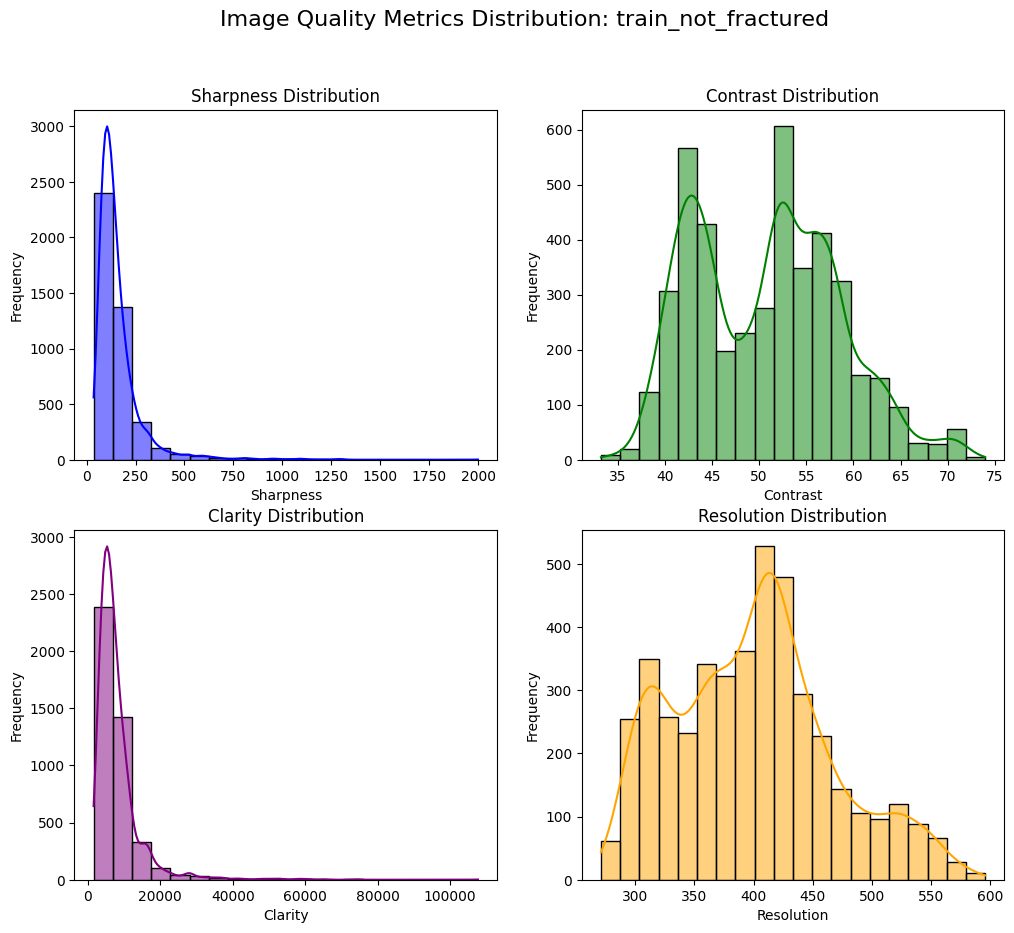

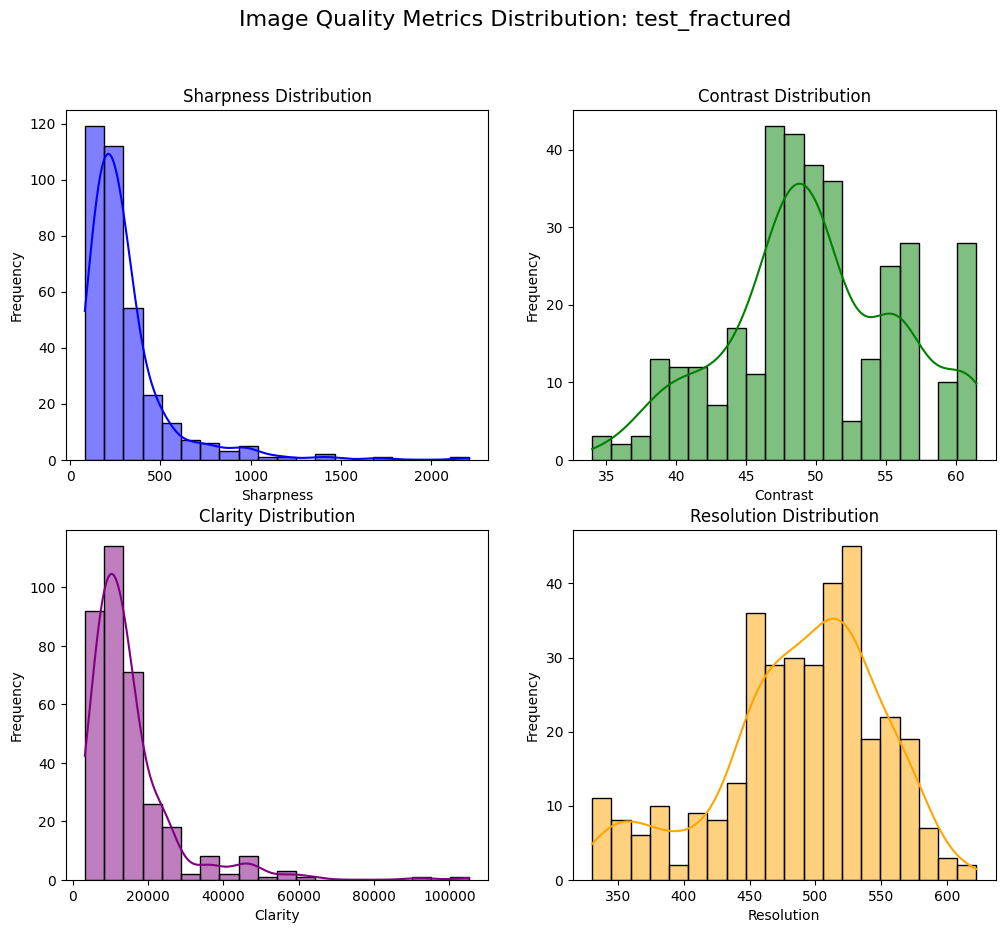

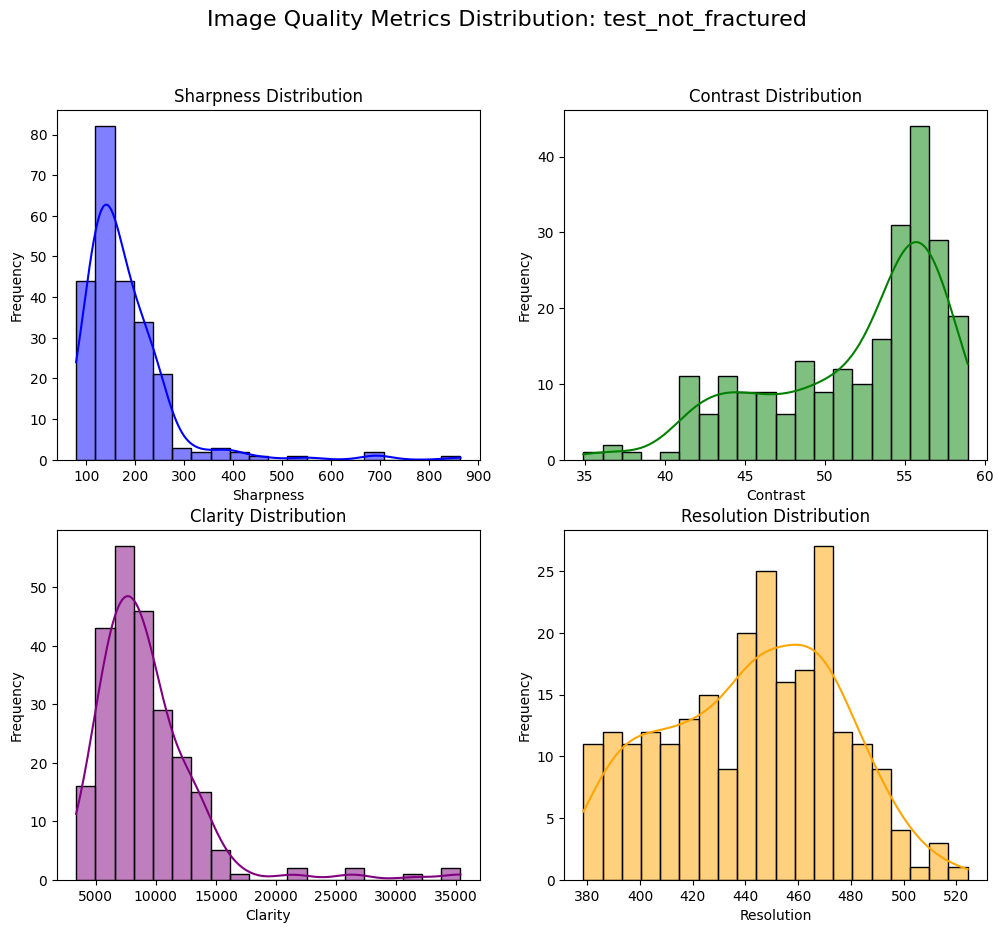

In [ ]:
# check quality and resolution
def analyze_image_quality(images):
  metrics = {
        "sharpness": [],
        "contrast": [],
        "clarity": [],
        "resolution": []
    }
  for image_path in images:
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        return None
    # laplacian
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    sharpness_val = laplacian.var()
    metrics["sharpness"].append(sharpness_val)
    # image contrast
    contrast_val = image.std()
    clarity_val = sharpness_val * contrast_val
    metrics["contrast"].append(contrast_val)
    metrics["clarity"].append(clarity_val)
    # sobel
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
    sobel = np.sqrt(sobel_x**2 + sobel_y**2)
    resolution_val = np.mean(sobel)
    metrics["resolution"].append(resolution_val)
  return metrics

directories = {
    'train_fractured': train_fractured_paths,
    'train_not_fractured':train_not_fractured_paths,
    'test_fractured': test_fractured_paths,
    'test_not_fractured': test_not_fractured_paths
}

for name, dir in directories.items():
    metrics = analyze_image_quality(dir)

    # Visualize the distributions
    plt.figure(figsize=(12, 10))
    plt.suptitle(f'Image Quality Metrics Distribution: {name}', fontsize=16)

    plt.subplot(2, 2, 1)
    sns.histplot(metrics["sharpness"], bins=20, kde=True, color='blue')
    plt.title('Sharpness Distribution')
    plt.xlabel('Sharpness')
    plt.ylabel('Frequency')

    plt.subplot(2, 2, 2)
    sns.histplot(metrics["contrast"], bins=20, kde=True, color='green')
    plt.title('Contrast Distribution')
    plt.xlabel('Contrast')
    plt.ylabel('Frequency')

    plt.subplot(2, 2, 3)
    sns.histplot(metrics["clarity"], bins=20, kde=True, color='purple')
    plt.title('Clarity Distribution')
    plt.xlabel('Clarity')
    plt.ylabel('Frequency')

    plt.subplot(2, 2, 4)
    sns.histplot(metrics["resolution"], bins=20, kde=True, color='orange')
    plt.title('Resolution Distribution')
    plt.xlabel('Resolution')
    plt.ylabel('Frequency')

    plt.show()


In [ ]:
# Enhance Images Quality

def enhance_image(dir):

  for image in os.listdir(dir):
      img = cv2.imread(os.path.join(dir, image))

      if img is not None:
          # Convert to grayscale
          gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

          # Enhance contrast
          clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
          enhanced = clahe.apply(gray)

          # Remove noise using Gaussian Blur
          denoised = cv2.GaussianBlur(enhanced, (5, 5), 0)

          # Save
          cv2.imwrite(os.path.join(dir, image), denoised)

directories = {
    'train_fractured': '/content/archive (6)/train/fractured',
    'train_not_fractured':'/content/archive (6)/train/not fractured',
    'test_fractured': '/content/archive (6)/val/fractured',
    'test_not_fractured': '/content/archive (6)/val/not fractured'
}

for name, dir in directories.items():
   enhance_image(dir)


Samples from train_fractured:


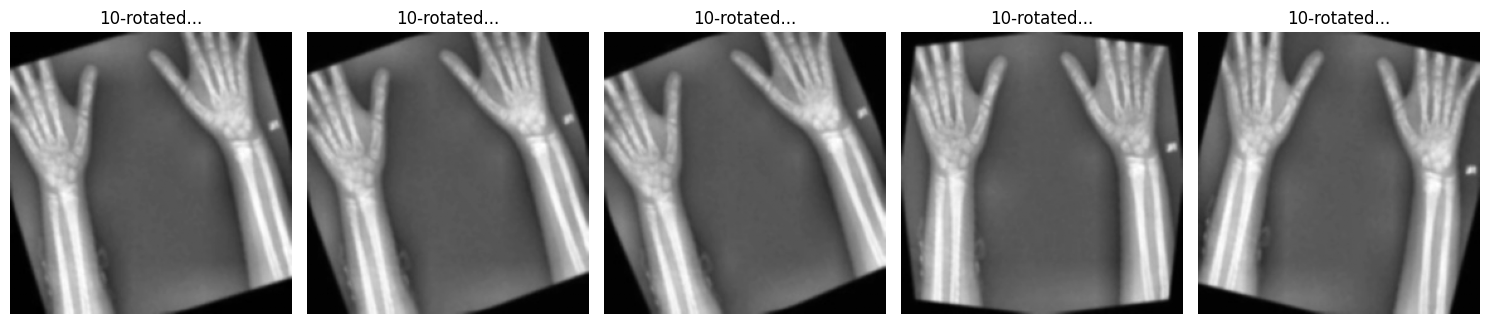

Samples from train_not_fractured:


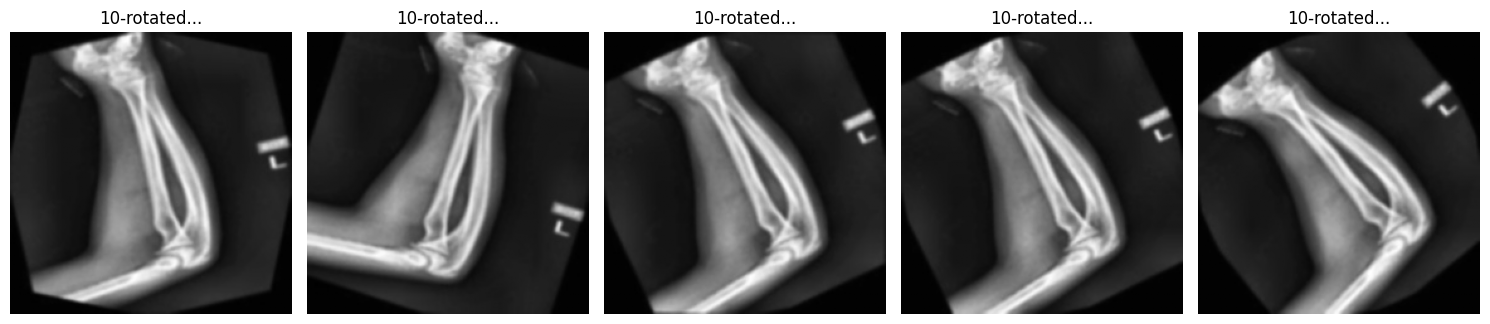

Samples from test_fractured:


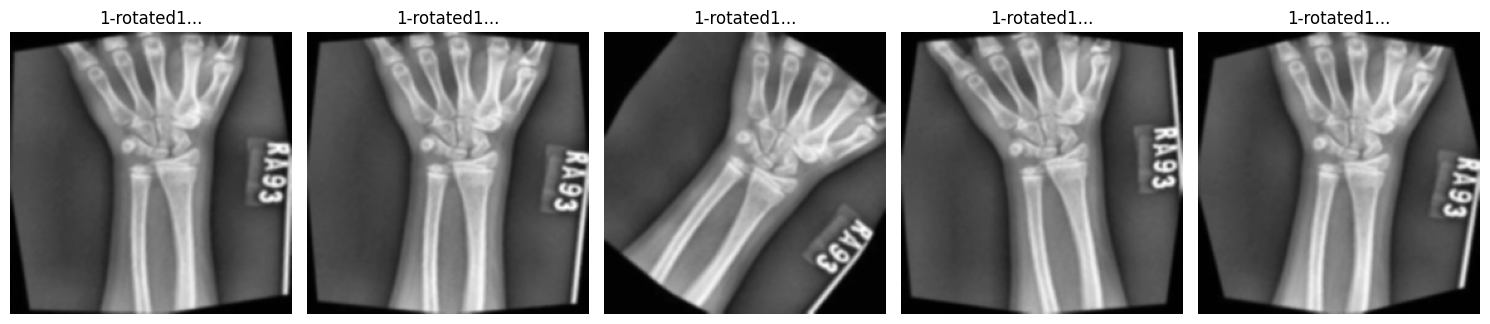

Samples from test_not_fractured:


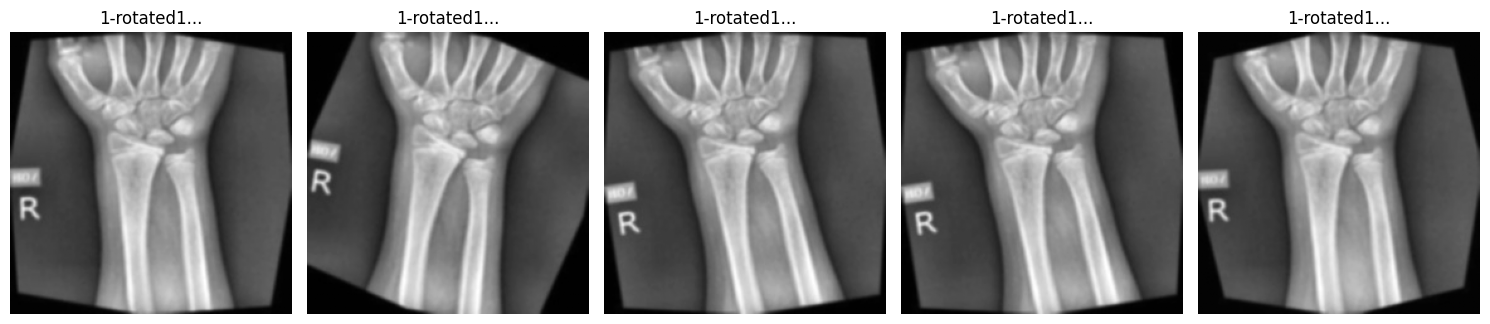

In [ ]:
# Visualize samples from all folders
for folder_name, folder_path in directories.items():
    print(f"Samples from {folder_name}:")
    visualize_samples(folder_path, num_samples=5)

# Data Labeling


In [ ]:
def create_image_label_csv(dir, output_csv,label,base_dir):
    header = ['image', 'label']

    with open(output_csv, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(header)

        # Walk through the dataset directory
        for image_path in dir:
            rel_path = os.path.relpath(image_path, base_dir)
            writer.writerow([rel_path, label])



# define new files with labels
train_fractured_labeled='/content/archive (6)/train/fractured-labeled'
train_not_fractured_labeled='/content/archive (6)/train/not fractured-labeled'
test_fractured_labeled='/content/archive (6)/val/fractured-labeled'
test_not_fractured_labeled='/content/archive (6)/val/not fractured-labeled'

create_image_label_csv(train_fractured_paths,train_fractured_labeled,1,'/content/archive (6)/train/fractured')
create_image_label_csv(train_not_fractured_paths,train_not_fractured_labeled,0,'/content/archive (6)/train/not fractured')
create_image_label_csv(test_fractured_paths,test_fractured_labeled,1,'/content/archive (6)/val/fractured')
create_image_label_csv(test_not_fractured_paths,test_not_fractured_labeled,0,'/content/archive (6)/val/not fractured')


In [ ]:
# save new labeled data
train_F_df=pd.read_csv('/content/archive (6)/train/fractured-labeled')
train_not_F_df=pd.read_csv('/content/archive (6)/train/not fractured-labeled')
test_F_df=pd.read_csv('/content/archive (6)/val/fractured-labeled')
test_not_F_df=pd.read_csv('/content/archive (6)/val/not fractured-labeled')

In [ ]:
train_F_df.head()

,image,label
0,43-rotated1-rotated1-rotated1.jpg,1
1,109-rotated1-rotated2-rotated1.jpg,1
2,33-rotated2-rotated2-rotated1.jpg,1
3,51-rotated3-rotated2.jpg,1
4,38-rotated3-rotated2-rotated2.jpg,1


In [ ]:
train_F_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4385 entries, 0 to 4384
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   4385 non-null   object
 1   label   4385 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 68.6+ KB


In [ ]:
train_not_F_df.head()

,image,label
0,43-rotated1-rotated1-rotated1.jpg,0
1,33-rotated2-rotated2-rotated1.jpg,0
2,69-rotated3-rotated2-rotated3-rotated1.jpg,0
3,39-rotated2-rotated3-rotated1-rotated1.jpg,0
4,51-rotated3-rotated2.jpg,0


In [ ]:
train_not_F_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4367 entries, 0 to 4366
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   4367 non-null   object
 1   label   4367 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 68.4+ KB


In [ ]:
test_F_df.head()

,image,label
0,6-rotated3-rotated1-rotated1.jpg,1
1,5-rotated2-rotated2-rotated1.jpg,1
2,7-rotated1-rotated1-rotated3.jpg,1
3,8-rotated2-rotated2-rotated3.jpg,1
4,3-rotated1-rotated2-rotated2.jpg,1


In [ ]:
test_F_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   348 non-null    object
 1   label   348 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.6+ KB


In [ ]:
test_not_F_df.head()

,image,label
0,3-rotated3-rotated3-rotated2-rotated1.jpg,0
1,3-rotated2-rotated1-rotated2-rotated1.jpg,0
2,1-rotated3-rotated3-rotated3-rotated1.jpg,0
3,3-rotated1-rotated2-rotated2.jpg,0
4,2-rotated2-rotated2.jpg,0


In [ ]:
test_not_F_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   240 non-null    object
 1   label   240 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.9+ KB


# Merge Labeled Data Into Train - Test

In [ ]:
train_df = pd.concat([train_F_df, train_not_F_df], ignore_index=True)

test_df = pd.concat([test_F_df, test_not_F_df], ignore_index=True)


In [ ]:
print("Training DataFrame:")
print(train_df.head())
print("\nTest DataFrame:")
print(test_df.head())


Training DataFrame:
                                image  label
0   43-rotated1-rotated1-rotated1.jpg      1
1  109-rotated1-rotated2-rotated1.jpg      1
2   33-rotated2-rotated2-rotated1.jpg      1
3            51-rotated3-rotated2.jpg      1
4   38-rotated3-rotated2-rotated2.jpg      1

Test DataFrame:
                              image  label
0  6-rotated3-rotated1-rotated1.jpg      1
1  5-rotated2-rotated2-rotated1.jpg      1
2  7-rotated1-rotated1-rotated3.jpg      1
3  8-rotated2-rotated2-rotated3.jpg      1
4  3-rotated1-rotated2-rotated2.jpg      1


In [ ]:
# shuffle the data
train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)
test_df = test_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
train_df

,image,label
0,75-rotated3-rotated1.jpg,1
1,44-rotated1-rotated2-rotated1-rotated1.jpg,0
2,94-rotated3-rotated2-rotated3.jpg,1
3,8-rotated3-rotated1-rotated2.jpg,0
4,62-rotated1-rotated2-rotated2.jpg,0
...,...,...
8747,61-rotated3-rotated1-rotated2.jpg,0
8748,14-rotated1-rotated1-rotated2-rotated1.jpg,0
8749,23-rotated1-rotated2-rotated3.jpg,0
8750,28-rotated2-rotated3-rotated1.jpg,1


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   588 non-null    object
 1   label   588 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.3+ KB


In [ ]:
test_df

,image,label
0,2-rotated2-rotated2-rotated3.jpg,0
1,1-rotated1-rotated1-rotated3.jpg,1
2,2-rotated3-rotated2-rotated1-rotated1.jpg,0
3,1-rotated2-rotated3.jpg,1
4,8-rotated3-rotated1.jpg,1
...,...,...
583,4-rotated1-rotated3-rotated2.jpg,1
584,1-rotated3-rotated3.jpg,1
585,8-rotated3-rotated3-rotated2.jpg,1
586,1-rotated3-rotated1-rotated3-rotated1.jpg,0


In [ ]:
train_counts = train_df['label'].value_counts().reset_index()
train_counts.columns = ['label', 'count']

fig_train = px.bar(train_counts, x='label', y='count',
                   labels={'label': 'Label', 'count': 'Count'},
                   title='Train Set Class Distribution',
                   color='label')
fig_train.show()

In [ ]:
test_counts = test_df['label'].value_counts().reset_index()
test_counts.columns = ['label', 'count']

fig_test = px.bar(test_counts, x='label', y='count',
                  labels={'label': 'Label', 'count': 'Count'},
                  title='Test Set Class Distribution',
                  color='label')
fig_test.show()

### save new labeled data

In [ ]:
train_df.to_csv("train_df.csv", index=False)
test_df.to_csv("test_df.csv", index=False)

In [ ]:
train_df.head()

,image,label
0,75-rotated3-rotated1.jpg,1
1,44-rotated1-rotated2-rotated1-rotated1.jpg,0
2,94-rotated3-rotated2-rotated3.jpg,1
3,8-rotated3-rotated1-rotated2.jpg,0
4,62-rotated1-rotated2-rotated2.jpg,0


In [ ]:
test_df.head()

,image,label
0,2-rotated2-rotated2-rotated3.jpg,0
1,1-rotated1-rotated1-rotated3.jpg,1
2,2-rotated3-rotated2-rotated1-rotated1.jpg,0
3,1-rotated2-rotated3.jpg,1
4,8-rotated3-rotated1.jpg,1


In [ ]:
train_df = pd.read_csv("train_df.csv")
test_df = pd.read_csv("test_df.csv")

# First ensure label is string (as required by flow_from_dataframe with binary mode)
train_df['label'] = train_df['label'].astype(str)
test_df['label'] = test_df['label'].astype(str)

# Now construct the correct full path for images
train_df['image'] = train_df.apply(lambda row: os.path.join(
    '/content/archive (6)/train',
    'fractured' if row['label'] == '1' else 'not fractured',
    row['image']
), axis=1)

test_df['image'] = test_df.apply(lambda row: os.path.join(
    '/content/archive (6)/val',
    'fractured' if row['label'] == '1' else 'not fractured',
    row['image']
), axis=1)



# Logisitc Regression

In [ ]:
def extract_features(image_paths, image_size=(224, 224)):
    model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg', input_shape=(224, 224, 3))
    features = []
    for path in image_paths:
        img = cv2.imread(path)
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        feature = model.predict(img_array, verbose=0)
        features.append(feature.flatten())
    return np.array(features)

X_train = extract_features(train_df['image'].values)
y_train = train_df['label'].values

X_test = extract_features(test_df['image'].values)
y_test = test_df['label'].values


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

logistic_regression_model = LogisticRegression(max_iter=1000,random_state=42)
logistic_regression_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
y_pred = logistic_regression_model.predict(X_test)
y_pred= y_pred.astype(int)
y_test= y_test.astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.56      0.90      0.69       240
           1       0.88      0.51      0.64       348

    accuracy                           0.67       588
   macro avg       0.72      0.70      0.67       588
weighted avg       0.75      0.67      0.66       588



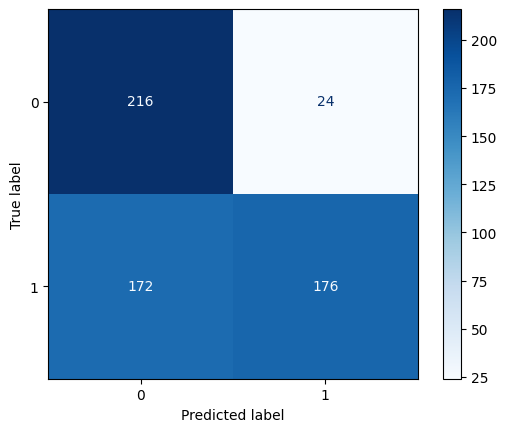

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

In [ ]:
#  visualize Loss Curve for logistic regression
losses = []
sgd_model = SGDClassifier(loss='log_loss', max_iter=5, warm_start=True, learning_rate='constant', eta0=0.01, random_state=42)

for i in range(10):
    sgd_model.fit(X_train_scaled, y_train)
    prob = sgd_model.predict_proba(X_train_scaled)
    loss = log_loss(y_train, prob)
    losses.append(loss)

# Plot loss
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=list(range(1, len(losses) + 1)),
    y=losses,
    mode='lines+markers',
    name='Training Loss',
    line=dict(color='blue'),
    marker=dict(symbol='circle', size=8)
))

fig.update_layout(
    title='Logistic Regression Loss Curve (via SGD)',
    xaxis_title='Iteration',
    yaxis_title='Log Loss',
    template='plotly_white'
)

fig.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning:

Maximum number of ite

In [ ]:
# visualize ROC curve for Logistic Reression
y_test = y_test.astype(int)
y_probs = logistic_regression_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=fpr, y=tpr,
    mode='lines',
    name=f'Logistic Regression (AUC = {roc_auc:.2f})',
    line=dict(color='blue')
))

# Add diagonal reference line
fig.add_trace(go.Scatter(
    x=[0, 1], y=[0, 1],
    mode='lines',
    line=dict(dash='dash', color='gray'),
    showlegend=False
))

# Update layout
fig.update_layout(
    title='ROC Curve - Logistic Regression',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    xaxis=dict(range=[0, 1]),
    yaxis=dict(range=[0, 1]),
    template='plotly_white'
)

fig.show()


# Kmeans

In [ ]:
X_all = np.concatenate((X_train, X_test), axis=0)
y_all = np.concatenate((y_train, y_test), axis=0)  # for later evaluation
X_scaled = scaler.fit_transform(X_all)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_


In [ ]:
from scipy.stats import mode
predicted_labels = np.zeros_like(labels)
y_all = y_all.astype(int)

for i in range(2):
    mask = (labels == i)
    true_labels_in_cluster = y_all[mask]
    values, counts = np.unique(true_labels_in_cluster, return_counts=True)
    majority_label = values[np.argmax(counts)]
y_all = y_all.astype(int)
print(confusion_matrix(y_all, predicted_labels))
print(classification_report(y_all, predicted_labels))

[[4607    0]
 [4733    0]]
              precision    recall  f1-score   support

           0       0.49      1.00      0.66      4607
           1       0.00      0.00      0.00      4733

    accuracy                           0.49      9340
   macro avg       0.25      0.50      0.33      9340
weighted avg       0.24      0.49      0.33      9340



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



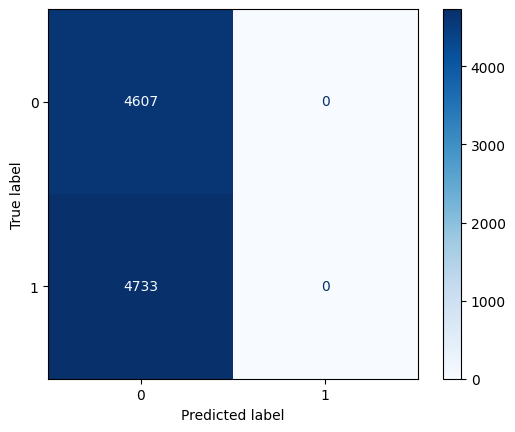

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_all, predicted_labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

In [ ]:
# visualiz Loss Curve for Kmeans
inertias = []
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(K), y=inertias, mode='lines+markers', name='Inertia',line=dict(color='purple')))
fig.update_layout(
    title='KMeans Inertia Curve (Elbow Method)',
    xaxis_title='Number of Clusters (k)',
    yaxis_title='Inertia',
    template='plotly_white'
)
fig.show()

In [ ]:
# visualize ROC curve for Kmeans
y_all = y_all.astype(int)
fpr, tpr, _ = roc_curve(y_all, predicted_labels)
roc_auc = auc(fpr, tpr)

fig = go.Figure()

# Add the ROC curve trace
fig.add_trace(go.Scatter(
    x=fpr,
    y=tpr,
    mode='lines',
    name=f'KMeans Clustering (AUC = {roc_auc:.2f})',
    line=dict(color='purple')
))

# Add the diagonal line for reference
fig.add_trace(go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    name='Random Classifier',
    line=dict(dash='dash', color='gray')
))

# Update layout
fig.update_layout(
    title='ROC Curve - KMeans',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    legend=dict(x=0.6, y=0.05),
    template='plotly_white'
)

# Show the plot
fig.show()


# CNN

In [ ]:
#  Prepare ImageDataGenerators
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
# Create Generators
train_df['label'] = train_df['label'].astype(str)
test_df['label'] = test_df['label'].astype(str)

train_gen = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image',
    y_col='label',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    color_mode='rgb',
    class_mode='binary'
)

test_gen = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='image',
    y_col='label',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    color_mode='rgb',
    class_mode='binary',
    shuffle=False
)


Found 8752 validated image filenames belonging to 2 classes.
Found 588 validated image filenames belonging to 2 classes.


# CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model3 = Sequential([
    Input(shape=(150, 150, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    layers.GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='accuracy',
    patience=3,
    restore_best_weights=True
)

history = model3.fit(
    train_gen,
    epochs=10,
    callbacks=[early_stopping]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 116s 399ms/step - accuracy: 0.5005 - loss: 0.6945
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 107s 390ms/step - accuracy: 0.5038 - loss: 0.6933
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 110s 402ms/step - accuracy: 0.5081 - loss: 0.6936
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 140s 397ms/step - accuracy: 0.5004 - loss: 0.6935
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 112s 409ms/step - accuracy: 0.5319 - loss: 0.6879
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 110s 400ms/step - accuracy: 0.5704 - loss: 0.6733
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 115s 420ms/step - accuracy: 0.5749 - loss: 0.6631
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 108s 393ms/step - accuracy: 0.5822 - loss: 0.6622
Epoch 9/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 105s 385ms/step - accuracy: 0.5920 - loss: 0.6499
Epoch 10/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 106s 387ms/step - accuracy: 0.6078 - loss: 0.6382


In [ ]:
test_loss, test_accuracy = model3.evaluate(test_gen)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.7622 - loss: 0.5083
Test Loss: 0.5153425335884094, Test Accuracy: 0.7551020383834839


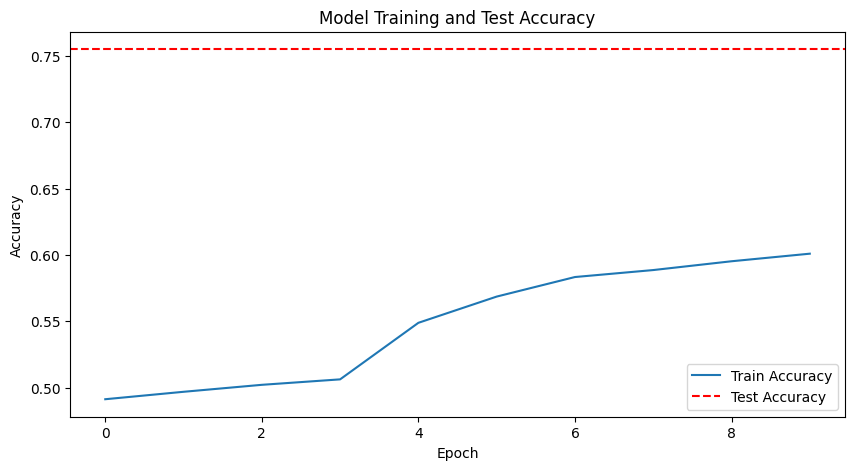

In [ ]:
import matplotlib.pyplot as plt

# Plot training accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.title('Model Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.7622 - loss: 0.5083
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


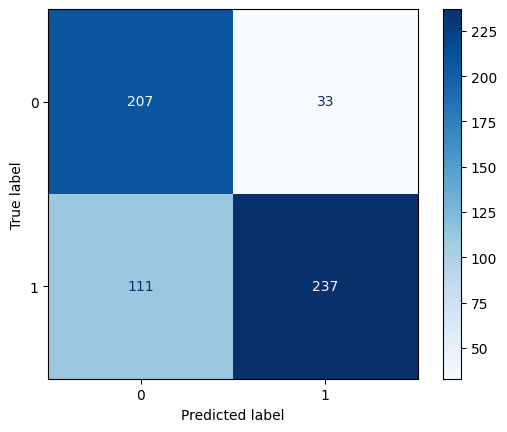

In [ ]:
test_loss, test_accuracy = model3.evaluate(test_gen)

# Get the model predictions
y_true = test_gen.classes
y_pred = model3.predict(test_gen, verbose=1)
y_pred_class = (y_pred > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_class)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

In [ ]:
# Loss Curve
fig_loss = go.Figure()
fig_loss.add_trace(go.Scatter(
    y=history.history['loss'],
    mode='lines+markers',
    name='Train Loss'
))
if 'val_loss' in history.history:
    fig_loss.add_trace(go.Scatter(
        y=history.history['val_loss'],
        mode='lines+markers',
        name='Validation Loss'
    ))
fig_loss.update_layout(
    title='Loss Curve Over Epochs',
    xaxis_title='Epoch',
    yaxis_title='Loss',
    template='plotly_white'
)
fig_loss.show()

In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve using Plotly
roc_curve_fig = go.Figure()
roc_curve_fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'ROC Curve (AUC = {roc_auc:.2f})'))
roc_curve_fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random', line={'dash': 'dash'}))

roc_curve_fig.update_layout(
    title='Receiver Operating Characteristic Curve',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    template='plotly_white'
)
roc_curve_fig.show()

# ResNet

In [ ]:
# Load ResNet50 base
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet_model.trainable = False  # Freeze base model

# Build custom head
model = models.Sequential([
    resnet_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(train_gen, validation_data=test_gen, epochs=10)



Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 148s 502ms/step - accuracy: 0.5030 - loss: 0.7260 - val_accuracy: 0.4082 - val_loss: 0.6942
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 111s 406ms/step - accuracy: 0.5050 - loss: 0.6932 - val_accuracy: 0.4082 - val_loss: 0.6937
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 114s 414ms/step - accuracy: 0.5006 - loss: 0.6931 - val_accuracy: 0.5918 - val_loss: 0.6928
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 110s 401ms/step - accuracy: 0.4947 - loss: 0.6932 - val_accuracy: 0.5918 - val_loss: 0.6927
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 111s 403ms/step - accuracy: 0.4979 - loss: 0.6932 - val_accuracy: 0.5918 - val_loss: 0.6924
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 113s 410ms/step - accuracy: 0.4859 - loss: 0.6932 - val_accuracy: 0.5918 - val_loss: 0.6924
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 141s 409ms/step - accuracy: 0.4934 - loss: 0.6932 - val_accuracy: 0.5918 - val_loss: 0.6924
Epoch 8/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 139s 398ms/step - accuracy: 0.4982 -

In [ ]:
test_gen.reset()
y_pred = (model.predict(test_gen) > 0.5).astype(int)
y_true = np.asarray(test_gen.classes, dtype=int)

# Metrics
print("Accuracy:", accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))


19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 276ms/step
Accuracy: 0.5918367346938775
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       240
           1       0.59      1.00      0.74       348

    accuracy                           0.59       588
   macro avg       0.30      0.50      0.37       588
weighted avg       0.35      0.59      0.44       588



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
# Loss Curve
fig_loss = go.Figure()
fig_loss.add_trace(go.Scatter(y=history.history['loss'], mode='lines+markers', name='Train Loss'))
fig_loss.add_trace(go.Scatter(y=history.history['val_loss'], mode='lines+markers', name='Val Loss'))

fig_loss.update_layout(
    title='Training vs Test Loss',
    xaxis_title='Epoch',
    yaxis_title='Loss',
    template='plotly_white'
)
fig_loss.show()

In [ ]:
# ROC Curve
from sklearn.metrics import roc_auc_score
y_probs = model.predict(test_gen).ravel()
fpr, tpr, thresholds = roc_curve(y_true, y_probs)
auc_score = roc_auc_score(y_true, y_probs)

fig_roc = go.Figure()
fig_roc.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'ROC Curve (AUC = {auc_score:.2f})'))
fig_roc.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random', line=dict(dash='dash')))

fig_roc.update_layout(
    title='ROC Curve',
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    template='plotly_white'
)
fig_roc.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step


## save the models


In [ ]:
import joblib
joblib.dump(logistic_regression_model, '/content/drive/MyDrive/Machine_Learning/logistic_regression_model.pkl')
joblib.dump(kmeans, '/content/drive/MyDrive/Machine_Learning/Kmeans.pkl')
joblib.dump(model3, '/content/drive/MyDrive/Machine_Learning/CNN_model3.pkl')
joblib.dump(model, '/content/drive/MyDrive/Machine_Learning/CNN_ResNet.pkl')

['/content/drive/MyDrive/Machine_Learning/CNN_model3.pkl']